# Regression Analysis on Housing Price

Our aim is to predict the sales price using the best **Linear Regression Analysis** algorithm that we have cross validated while *5-fold cross validation*.

We have used following techniques:

Technique | Method | Package
--- | --- | ---
**Ordinary Least Square** | LinearRegression | sklearn.linear_model
**Ridge Analysis** | RidgeCV | sklearn.linear_model
**Lasso Analysis** | LassoCV | sklearn.linear_model
**Elastic Net Analysis** | ElasticNetCV | sklearn.linear_model

The project is organised as below:
1. Data Loading & Exploration
2. Data Prepration
    A. Preliminary Data Preparation
    B. Data Preparation (Linearity Check, Encoding, Feature Engineering)
3. Linear Regression Analysis
4. Cross Validation for techniques selection
5. Fit Model & Predict

In [1]:
#import numpy & pandas
import numpy as np
import pandas as pd

#import commonly used visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset into dataframe
df = pd.read_csv("train.csv", na_values = ['?', ''], delimiter=',', delim_whitespace=False)

### Data Exploration

In [3]:
#Check the dimension of dataframe
print("Total no. of rows:", df.shape[0])
print("Total no. of cols:", df.shape[1])

Total no. of rows: 1460
Total no. of cols: 81


The number of columns are quite high, so it would be better if we find correlated columns & remove those

Text(0.5,1,'Fig1: Correlation Matrix of all features')

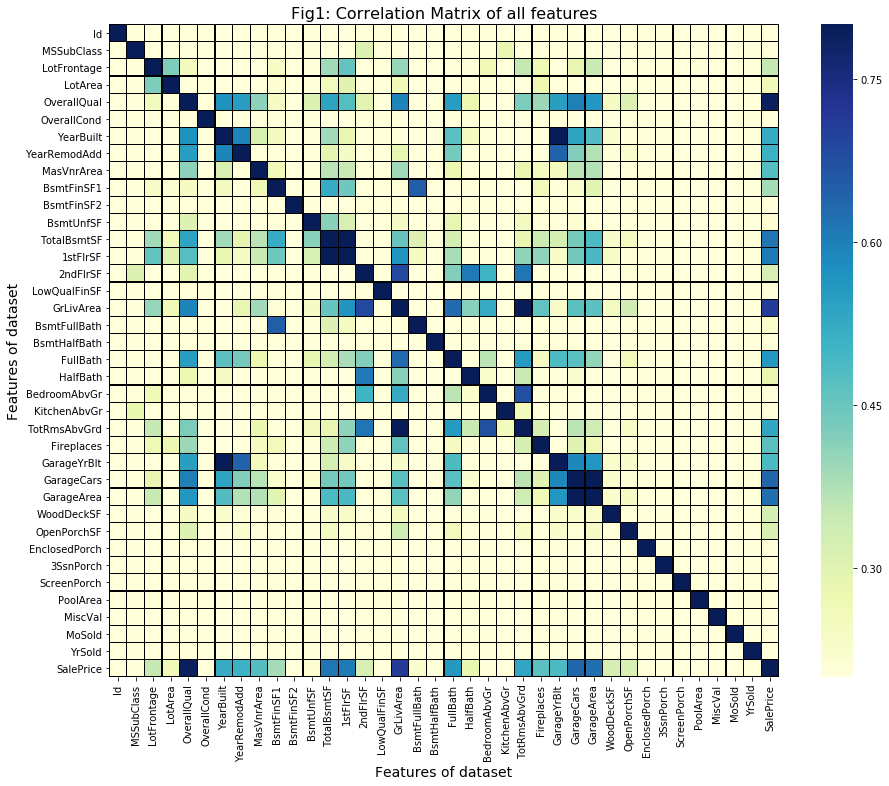

In [4]:
#correlation matrix
cor_mat = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(cor_mat, linewidth =0.2, linecolor="black", vmax=0.8, vmin=0.2, cmap="YlGnBu")
plt.xlabel("Features of dataset", fontsize=14)
plt.ylabel("Features of dataset", fontsize=14)
plt.title("Fig1: Correlation Matrix of all features", fontsize=16)

Following Features have high correlation ratio to SalePrice:
1. OverallQual
2. GrLivArea
3. GarageCars
4. GarageArea
5. 1stFlrSF
6. TotalBsmtSF

Alternatively, to figure out the highest feature correlation, we can use the following code:
```python
cor_mat.SalePrice.sort_values(ascending=False)
```

Lets use Scatter Plot to reveal the nature of correlation of highly correlated variable

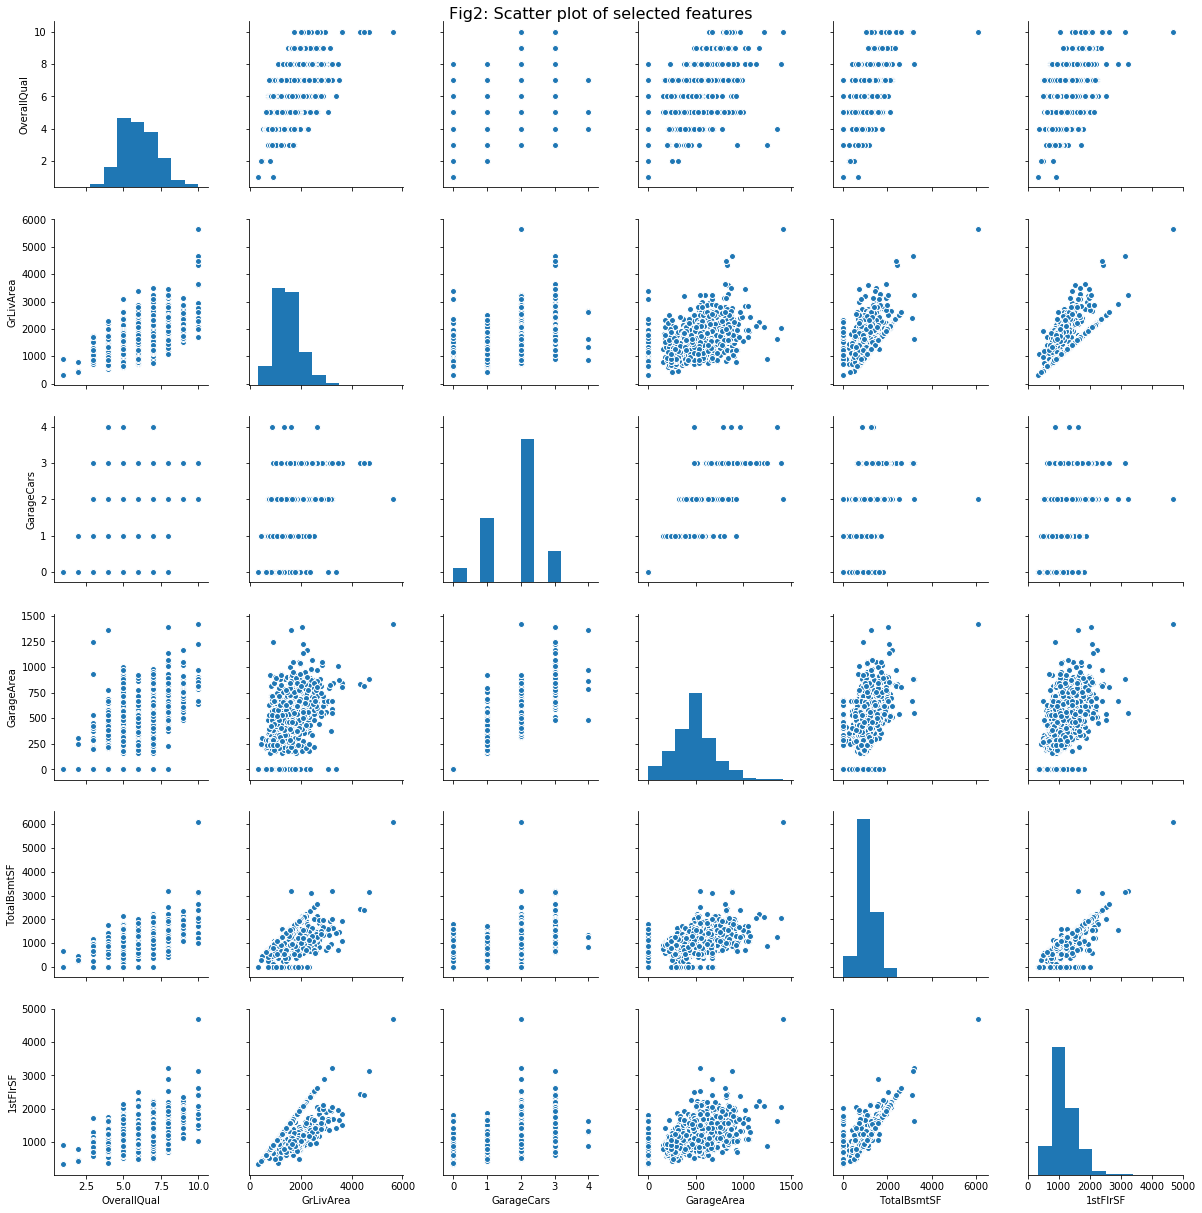

In [5]:
#scatter plot
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(df[cols], size=2.8)
plt.suptitle("Fig2: Scatter plot of selected features",x=0.5, y=1, verticalalignment='top', fontsize=16)
plt.tight_layout()
plt.show();

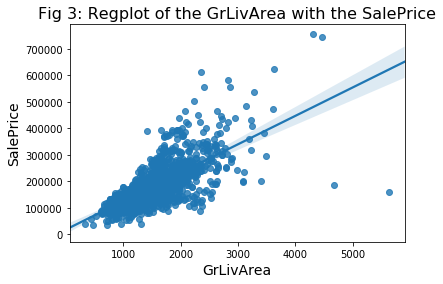

In [6]:
#Regression Plot - A
ax = sns.regplot(y=df.SalePrice, x=df.GrLivArea)
plt.ylabel("SalePrice", fontsize=14)
plt.xlabel("GrLivArea", fontsize=14)
plt.title('Fig 3: Regplot of the GrLivArea with the SalePrice', fontsize= 16)
plt.show();

### Removing Outliers

In [7]:
#Removing outliers using indexes & resetting it after removal
out1 = df.GrLivArea.sort_values(ascending=False).head(2)
df.drop(out1.index, inplace=True)
df.reset_index(inplace=True)

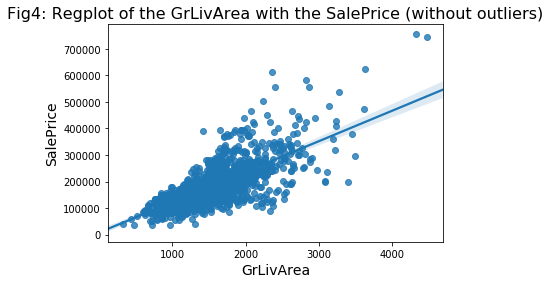

In [8]:
#Regression Plot - B
ax = sns.regplot(y=df.SalePrice, x=df.GrLivArea)
plt.ylabel("SalePrice", fontsize=14)
plt.xlabel("GrLivArea", fontsize=14)
plt.title('Fig4: Regplot of the GrLivArea with the SalePrice (without outliers)', fontsize= 16)
plt.show();

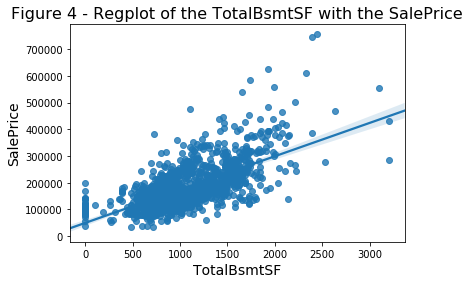

In [9]:
#Regression Plot - A
ax = sns.regplot(y=df.SalePrice, x=df.TotalBsmtSF)
plt.ylabel("SalePrice", fontsize=14)
plt.xlabel("TotalBsmtSF", fontsize=14)
plt.title('Figure 4 - Regplot of the TotalBsmtSF with the SalePrice', fontsize= 16)
plt.show();

## Data Preparation

In [10]:
#missing values
print("The columns with NA or Null Values are:")
print(",".join(df.columns[df.isnull().any()]))

The columns with NA or Null Values are:
LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature


In [11]:
#Replace for categorical columns
#Alley
df.Alley.fillna(inplace=True,value='No')
#BsmtQual
df.BsmtQual.fillna(inplace=True,value='No')
#BsmtCond
df.BsmtCond.fillna(inplace=True,value='No')
#BsmtExposure
df.BsmtExposure.fillna(inplace=True,value='No')
#BsmtFinType1
df.BsmtFinType1.fillna(inplace=True,value='No')
#BsmtFinType2
df.BsmtFinType2.fillna(inplace=True,value='No')
#FireplaceQu
df.FireplaceQu.fillna(inplace=True,value='No') 
#GarageType
df.GarageType.fillna(inplace=True,value='No')
#GarageFinish
df.GarageFinish.fillna(inplace=True,value='No')
#GarageQual 
df.GarageQual.fillna(inplace=True,value='No')    
#GarageCond
df.GarageCond.fillna(inplace=True,value='No')
#PoolQC
df.PoolQC.fillna(inplace=True,value='No')    
#Fence
df.Fence.fillna(inplace=True,value='No')
#MiscFeature
df.MiscFeature.fillna(inplace=True,value='No')

In [12]:
#missing values
print("The Numerical columns with NA or Null Values are:")
print(",".join(df.columns[df.isnull().any()]))

The Numerical columns with NA or Null Values are:
LotFrontage,MasVnrType,MasVnrArea,Electrical,GarageYrBlt


In [13]:
#impute the missing values with 0
df.BsmtFinSF1.fillna(inplace=True,value=0)
df.BsmtFinSF2.fillna(inplace=True,value=0)
df.BsmtUnfSF.fillna(inplace=True,value=0)
df.TotalBsmtSF.fillna(value=0,inplace=True)
df.BsmtFullBath.fillna(inplace=True,value=0)
df.BsmtHalfBath.fillna(inplace=True,value=0)
df.GarageCars.fillna(value=0,inplace=True)
df.GarageArea.fillna(value=0,inplace=True)
df.LotFrontage.fillna(inplace=True,value=0)
df.GarageYrBlt.fillna(inplace=True,value=0)
df.MasVnrArea.fillna(inplace=True,value=0)

In [14]:
#missing values
print("The columns with NA or Null Values are:")
print(",".join(df.columns[df.isnull().any()]))

The columns with NA or Null Values are:
MasVnrType,Electrical


In [15]:
#KitchenQual
df.KitchenQual = df.KitchenQual.mode()[0]
#Functional
df.Functional = df.Functional.mode()[0]
#Utilities
df.Utilities = df.Utilities.mode()[0]  
#SaleType
df.SaleType  = df.SaleType.mode()[0]
#Exterior1st- nao posso remover linhas do teste
df.Exterior1st = df.Exterior1st.mode()[0]
#Exterior2nd
df.Exterior2nd = df.Exterior2nd.mode()[0]       
#Electrical - remove the records where the value is NA
df.Electrical = df['Electrical'].mode()[0]
#MSZoning   - tem NA apenas na base de teste. Como nao posso remover linhas removo a coluna   
df.MSZoning = df.MSZoning.mode()[0]
#MasVnrType - remove the records where the value is NA 
df.MasVnrType=df['MasVnrType'].mode()[0]

In [16]:
#missing values
print("The columns with NA or Null Values are:")
print(",".join(df.columns[df.isnull().any()]))

The columns with NA or Null Values are:



### Encoding

For ordinal values following codes can be used
``` python
map_list = {'key1':'value1', 'key2':'value2'}
df.col = df.col.map(map_list)
df.col = df.col.astype('int64')
```

In [17]:
#Mapping ordinal features

#LotShape: General shape of property
lotshape_map = {'Reg':'8','IR1':'6','IR2':'4','IR3':'2'}
df.LotShape = df.LotShape.map(lotshape_map)
df.LotShape = df.LotShape.astype('int64')

#Utilities: Type of utilities available       
utilities_map = {'AllPub':'8','NoSewr':'6','NoSeWa':'4','ELO':'2'}
df.Utilities = df.Utilities.map(utilities_map)
df.Utilities = df.Utilities.astype('int64')
    
#LandSlope: Slope of property
landslope_map = {'Gtl':'6','Mod':'4','Sev':'2'}
df.LandSlope = df.LandSlope.map(landslope_map)
df.LandSlope = df.LandSlope.astype('int64')

#ExterQual: Evaluates the quality of the material on the exterior 
quality_map = {'Ex':'10','Gd':'8','TA':'6','Fa':'4','Po':'2','No':'0'}
df.ExterQual = df.ExterQual.map(quality_map)
df.ExterQual = df.ExterQual.astype('int64')

#ExterCond: Evaluates the present condition of the material on the exterior
df.ExterCond = df.ExterCond.map(quality_map)
df.ExterCond = df.ExterCond.astype('int64')

#BsmtQual: Evaluates the height of the basement
df.BsmtQual = df.BsmtQual.map(quality_map)
df.BsmtQual = df.BsmtQual.astype('int64')

#BsmtCond: Evaluates the general condition of the basement
df.BsmtCond = df.BsmtCond.map(quality_map)
df.BsmtCond = df.BsmtCond.astype('int64')

#HeatingQC: Heating quality and condition
df.HeatingQC = df.HeatingQC.map(quality_map)
df.HeatingQC = df.HeatingQC.astype('int64')
        
#KitchenQual: Kitchen quality
df.KitchenQual = df.KitchenQual.map(quality_map)
df.KitchenQual = df.KitchenQual.astype('int64')

#FireplaceQu: Fireplace quality
df.FireplaceQu = df.FireplaceQu.map(quality_map)
df.FireplaceQu = df.FireplaceQu.astype('int64')

#GarageFinish: Interior finish of the garage
garage_map = {'Fin':'6', 'RFn':'4', 'Unf':'2', 'No':'0'}    
df.GarageFinish = df.GarageFinish.map(garage_map)
df.GarageFinish = df.GarageFinish.astype('int64')

#GarageQual: Garage quality
df.GarageQual = df.GarageQual.map(quality_map)
df.GarageQual = df.GarageQual.astype('int64')

#GarageCond: Garage condition
df.GarageCond = df.GarageCond.map(quality_map)
df.GarageCond = df.GarageCond.astype('int64')

#PoolQC: Pool quality
df.PoolQC = df.PoolQC.map(quality_map)
df.PoolQC = df.PoolQC.astype('int64')

For numerical values following codes can be used
``` python
df.col = df.col.astype('str')
```

In [18]:
# MSSubClass as str
df['MSSubClass'] = df['MSSubClass'].astype("str")
# Year and Month to categorical
df['YrSold'] = df['YrSold'].astype("str")
df['MoSold'] = df['MoSold'].astype("str") 

For str to num conversion
``` python
df.col = df.col.astype('int64')
```

In [19]:
df.OverallCond = df.OverallCond.astype("int64")
df.OverallQual = df.OverallQual.astype("int64")
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype("int64")

In [20]:
#one hot coding
data_train = pd.get_dummies(df)
print("New shape after one-hot encoding:" , np.shape(data_train))

New shape after one-hot encoding: (1458, 229)


### Linearity Check

1. Prepare Dependent & Independent data
2. Preprocessing for standardizing & normalizing data
3. Use Linear Reg model, fit & predict
4. Plot predicted values & residuals (y - predicted)

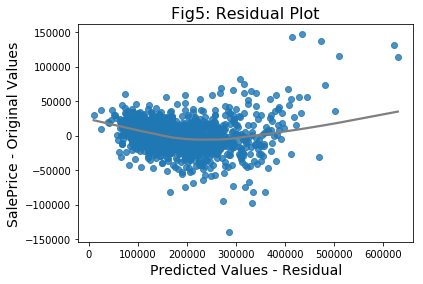

In [21]:
from sklearn.linear_model import LinearRegression #Reg model fitter
from sklearn import preprocessing #for scaling & standardizing data
import statsmodels.api as sm

x_train = data_train.drop('SalePrice', axis=1)
y_train = data_train.SalePrice

scaler = preprocessing.StandardScaler()
x_train_s = scaler.fit_transform(x_train)

lin1 = LinearRegression()
lin1.fit(x_train_s, y_train)

pred = lin1.predict(x_train_s)
ax = sns.regplot(x=pred, y=y_train-pred, line_kws={"color":"gray"}, lowess=True) #locally weighted plot
ax.set_xlabel("Predicted Values - Residual", fontsize=14)
ax.set_ylabel("SalePrice - Original Values", fontsize=14)
ax.set_title('Fig5: Residual Plot', fontsize= 16)
plt.show();

### Mean Squared Error

In [22]:
print("Mean squared error: ",np.log(sum(np.power((y_train-pred),2))/x_train.shape[0]))

Mean squared error:  20.01180961622067


In case the MSE is high then try log transformation of y values

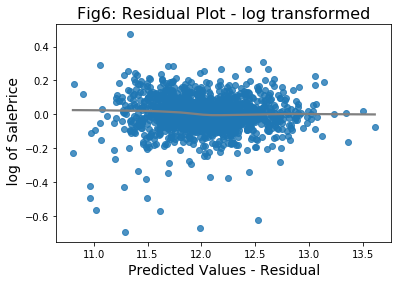

Mean squared error:  0.01015692932307609


In [23]:
#log of y_train
lin1 = LinearRegression()
lin1.fit(x_train_s, np.log(y_train))

pred = lin1.predict(x_train_s)
ax = sns.regplot(x=pred, y=np.log(y_train)-pred, line_kws={"color":"gray"}, lowess=True) #locally weighted plot
ax.set_xlabel("Predicted Values - Residual", fontsize=14)
ax.set_ylabel(" log of SalePrice", fontsize=14)
ax.set_title('Fig6: Residual Plot - log transformed', fontsize= 16)
plt.show();

print("Mean squared error: ",sum(np.power((np.log(y_train)-pred),2))/x_train.shape[0])

In [24]:
data_train['SalePrice'] = np.log(data_train.SalePrice) #Moving ahead with transformed variables

### Engineer new Features

In [25]:
#New Variable which will give a holistic data for any house
data_train['TotalSF'] = data_train['TotalBsmtSF'] + data_train['1stFlrSF'] + data_train['2ndFlrSF'] + data_train['GarageArea']

### Feature Reduction

In [26]:
#bringing in libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
#from tabulate import tabulate

In [27]:
#Tree based feature selection
x_train = data_train.drop('SalePrice', axis=1)
y_train = data_train['SalePrice']


#clf2 = ExtraTreesRegressor(random_state=0,n_estimators=1400)
clf1 = RandomForestRegressor(n_estimators=1400, criterion='mse', 
                max_depth=None, min_samples_split=2, min_samples_leaf=1,
                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                oob_score=False, n_jobs=1, random_state=0, verbose=0, warm_start=False)

clf1.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
#clf1.feature_importances_
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf1.feature_importances_
data = data.transpose()
data.columns = ['Imp']
data.sort_values(by='Imp', ascending=False).head(10)

,Imp
TotalSF,0.547756
OverallQual,0.243287
YearBuilt,0.019440
YearRemodAdd,0.018766
LotArea,0.012352
OverallCond,0.012146
GrLivArea,0.010478
BsmtUnfSF,0.008572
BsmtFinSF1,0.007723
1stFlrSF,0.006524


In [29]:
#Select the features based on the threshold
model = SelectFromModel(clf1, prefit=True,threshold=1e-3)
#Reduce data to the selected features.
aux = model.transform(x_train)

In [30]:
print("The new shape of reduced dataset is {}".format(aux.shape))
data_train_less_features_aux = pd.DataFrame(aux)
data_train_less_features_aux.columns = [df.columns[i] for i in range(0,aux.shape[1]) ]
print("\n Features selected :")
print(data_train_less_features_aux.columns)
data_train_less_features = pd.concat([data_train_less_features_aux,pd.DataFrame(y_train)],axis=1)

The new shape of reduced dataset is (1458, 41)

 Features selected :
Index(['index', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating'],
      dtype='object')


### Linear Regression
    Making use of scikit learn to figure out best method for linear regression out of the listed below

In [31]:
#Some usefull packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


#Python dictionary to collect the results
RMSE_results = {
    
    'LinearRegression':0.0,
    'Lasso':0.0,
    'Ridge':0.0,
    'ElasticNet':0.0,
    #'SVM':0.0,
    #'NN':0.0,    
    #'RF':0.0
    
}

from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn import preprocessing

x_train = data_train_less_features.drop('SalePrice',axis=1).values
y_train = data_train_less_features['SalePrice'].values

#### Ordinary Least Square

In [34]:
print("Linear Regression")


#Cross validation
classifier = LinearRegression(fit_intercept=True, normalize=False,
                                              copy_X=True, n_jobs=1)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(x_train[training,:])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
    
    classifierLinearRegression = classifier.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['LinearRegression'] = score

Linear Regression

 Average RMSE: 0.12352924992357944


#### Ridge

In [35]:
print("Ridge \n\n")

classifier = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, 
                     scoring=None, cv=None, gcv_mode=None, store_cv_values=False)

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    pred = []
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]

    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['Ridge'] = score

Ridge 



 Average RMSE: 0.1233039319764471


#### Lasso

In [36]:
print("Lasso \n\n")

classifier = LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
                     normalize=False, precompute='auto', max_iter=1000, tol=0.0001, 
                     copy_X=True, cv=None, verbose=False, n_jobs=1, positive=False,
                     random_state=None, selection='cyclic')

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    pred = []
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
        
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['Lasso'] = score

Lasso 



 Average RMSE: 0.12390391476191906


#### Elastic Net

In [37]:
print("Elastic Net \n\n")

classifier = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None,
                          fit_intercept=True, normalize=False, precompute='auto', 
                          max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, 
                          n_jobs=1, positive=False, random_state=None, selection='cyclic')

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    pred = []   
        
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['ElasticNet'] = score

Elastic Net 



 Average RMSE: 0.12379142888352161


Text(0.5,0,'Models')

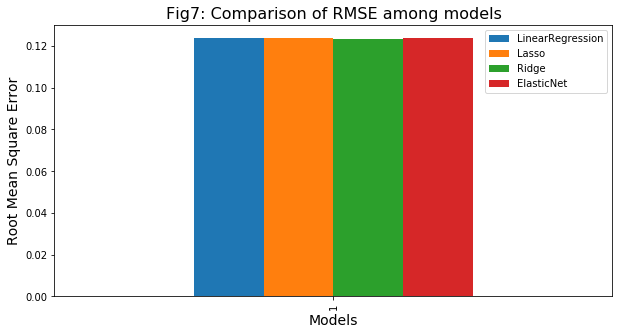

In [38]:
fig_1 = pd.DataFrame(RMSE_results, index=(1,) )
ax = fig_1.plot(kind='bar',figsize=(10,5))
ax.set_title("Fig7: Comparison of RMSE among models", fontsize=16)
ax.set_ylabel('Root Mean Square Error', fontsize=14)
ax.set_xlabel('Models', fontsize=14)

## Next is Box-Cox Transformation